<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="ffffff">
Resnet code

</font>
</h1>

pariya branch

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
import sys
import pandas as pd
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from keras.layers import BatchNormalization

In [2]:
get_ipython().system('pip install efficientnet')

In [4]:
#from tensorflow.keras.applications import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input

base_model = tf.keras.applications.ResNet50(weights="imagenet",
    input_shape=(100, 100, 3),
    include_top=False)

In [42]:
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [43]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='softmax'))

In [44]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_ds = train_datagen.flow_from_directory(
    r'E:\projectDataset\archive\sl_train',
    class_mode='categorical',
    target_size=(100,100),
    shuffle=True,
    batch_size=32
)


test_datagen = ImageDataGenerator(rescale=1./255)
test_ds_ = test_datagen.flow_from_directory(
    r'E:\projectDataset\archive\sl_test',
    class_mode='categorical',
    target_size=(100,100),
    batch_size=32
)



val_datagen = ImageDataGenerator(rescale=1./255)
val_ds = val_datagen.flow_from_directory(
    r'E:\projectDataset\archive\sl_valid',
    class_mode='categorical',
    target_size=(100,100),
    shuffle=True,
    batch_size=32
)



Found 2907 images belonging to 12 classes.
Found 1166 images belonging to 12 classes.
Found 1420 images belonging to 12 classes.


In [45]:
model.compile(optimizer='adam', loss = "categorical_crossentropy" , metrics =['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping2_acc = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    monitor="accuracy",
    restore_best_weights=True,
    mode="auto"
)

early_stopping2_loss = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    monitor="loss",
    restore_best_weights=True,
    mode="auto"
)

history2 = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 5,
    
    validation_data= val_ds,
    callbacks = [early_stopping2_acc, early_stopping2_loss]
    )
    

Epoch 1/5
91/91 [==============================] - 94s 981ms/step - loss: 3.0028 - accuracy: 0.1276 - val_loss: 2.2379 - val_accuracy: 0.2239
Epoch 2/5
91/91 [==============================] - 109s 1s/step - loss: 2.2720 - accuracy: 0.1928 - val_loss: 2.1330 - val_accuracy: 0.2866
Epoch 3/5
91/91 [==============================] - 115s 1s/step - loss: 2.1253 - accuracy: 0.2579 - val_loss: 2.0680 - val_accuracy: 0.2648
Epoch 4/5
91/91 [==============================] - 91s 1s/step - loss: 2.0740 - accuracy: 0.2412 - val_loss: 1.9586 - val_accuracy: 0.2908
Epoch 5/5
91/91 [==============================] - ETA: 0s - loss: 2.0002 - accuracy: 0.2898

KeyboardInterrupt: 

In [51]:
model.save('../models/4fruit_disease_classifier_resnet.h5')

In [50]:
test_loss, test_accuracy = model.evaluate(test_ds_, steps=len(test_ds_)/32)
print('Accuracy on test dataset:', test_accuracy)

1/1 [==============================] - 2s 6s/step - loss: 2.2938 - accuracy: 0.2344                  
Accuracy on test dataset: 0.234375


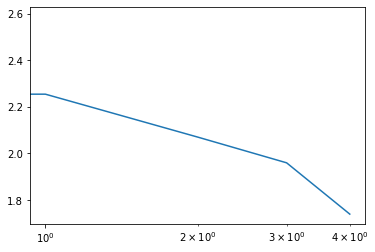

In [52]:
import matplotlib.pyplot as plt

plt.semilogx( history2.history["loss"])

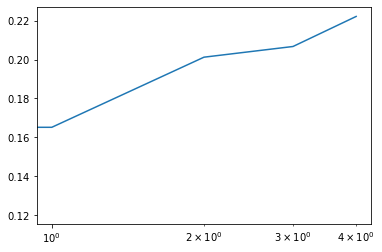

In [13]:
plt.semilogx( history2.history["accuracy"])